# Plotting of Evaluation Results

*Here, use seaborn, which calculates a bootstrapped 95% CI, which looks nicer and more narrow than 
with matplotlib*

Results aggregated with `aggregator.py 0 49`. Specify which results to aggregate in `settings.py`.
`0 49` means aggregate run 0-49; adjust as needed.

Results are inside `transformed_0-49`. `ci-t-metrics.csv` are the correct results.

Goal: Show that the algorithms achieve good results in terms of successful flows and delay.
Compare the different algorithms. Also differnt capacities. Focus on DFN network (58 nodes) and large GTS CE (149 nodes).

Seems like SPR1 is just worse than SPR2. I might drop it from the paper.

## Successful flows

In [42]:
# FIXME: bjointsp and bjointsp_recalc metrics don't record flows until time step 1000 --> much less flows
# why are the error bars in matplotlib so much bigger than in seaborn?
    # --> seaborn plots the 95% bootstrapped confidence interval by default (!= normal conf interval)

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# settings

result_dir = 'transformed'
# result_dir = 'transformed_70-72'
config = 'hc'
network = 'dfn_58.graphml'

labels = ['GPASP', 'SPR1', 'SPR2', 'BSP', 'BSP Re']
markers = ['x', 'o', '+', 'v', '^']

In [44]:
df = pd.read_csv(f'{result_dir}/{config}/{network}/flow/ci-t-metrics.csv',
                 names=['Ingress %', 'Value', 'Metric', 'Algorithm'])
df.head()


,Ingress %,Value,Metric,Algorithm
0,0.1,1340.0,total_flows,gpasp
1,0.1,1298.0,successful_flows,gpasp
2,0.1,0.0,dropped_flows,gpasp
3,0.1,42.0,in_network_flows,gpasp
4,0.1,1.0,perc_successful_flows,gpasp


In [45]:
def plot_successful(df, labels):
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.set(font_scale=1.1, style='white')
    
    df_successful = df[df['Metric'] == 'perc_successful_flows']
    print(df_successful['Algorithm'].unique())
    
    sns.lineplot(df_successful['Ingress %'], df_successful['Value'], hue=df_successful['Algorithm'], ax=ax,
                 err_style='bars', err_kws={'capsize': 4},
                 style=df_successful['Algorithm'], markers=True, legend=False)
    
    ax.set_xlabel('Ingress %')
    ax.set_ylabel('Successful Flows [%]')
    # ax.set_ylim(0, 1.05)
    ax.tick_params(axis='both', direction='inout', length=5, bottom=True, left=True, right=True, top=True)
    
    # TODO: adjust to order in printed algorithm order
    plt.legend(labels=labels)


['gpasp' 'spr1' 'spr2']


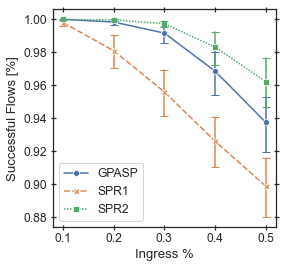

In [46]:
plot_successful(df, labels=['GPASP', 'SPR1', 'SPR2'])
